<a href="https://colab.research.google.com/github/SumalyaPatnala/CommentToxicityMeter/blob/main/Toxic_Comment_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'jigsaw-toxic-comment-classification-challenge:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F8076%2F44219%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240712%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240712T182758Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D870204d7796ae2a96a3e4438a5bc557fe40fb01dfa5ad13919f651dfd3bc733c3f1edda468377b602ffeef0dfda64c69a79f81974faf381ab591a5f1a2aadbceba64e25d2917bc9de584e36b16cd67860e936a48a577462f2382abe25c8f05fea238050dc43038248880ed7ce05535d12742240c3786fce5b942e3889686676fdaebfaf6b28979306a1d1baa69d7c531ee0d7c0fd992b6d66f5ac70ad78d8c4a5a7520d84b874f25d5261568cf3ea67c98c4966082e5bf8d10b2120a7ff31045c00f54d1171be72a605a4d6f40f793468d3447ebae8deac2ad80317c3b8092ed2fe111b4fd453141506cbe7931b0750f9f3798f3884e23a6bbc32b969a473653,youtube-toxicity-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2390305%2F4034417%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240712%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240712T182758Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8ae70a5ac40c1267a4c9684c361dc1d9842d2a5dcd348be72822c2922ecc050ad47754dea16c3964359ce73a080b173f59d0f2631eeea3707693a7bf7a6f421f4b10d747ad96a74176ea0907d9777a56fd637fc8f5d11acd91ca97e7c57df4653599b2a81b5e675f43dd93f65a94884ea183dfad2c20afaafc89f441a26d79aec4aaa2ef430d559f0f97dc3e29717d1d7c86ded498811a1ecc616e9e377dcab9964d4eaa7c14f24f12339c538d3408a6df6bfb3c28af0f9b2cb9f281f53acabac3ee7bfb1a445e3b85f92e59e2b8be394ca9c143193196f3a6e1be7059c2d6615f042706f873a81707f574d51f11de3d0671e120372be9f26c5c28a2d7b0923e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 55201987 bytes downloaded
Downloaded and uncompressed: jigsaw-toxic-comment-classification-challenge
[==================================================] 99167 bytes downloaded
Downloaded and uncompressed: youtube-toxicity-data
Data source import complete.


# Why Toxic Comment Detection is Needed
Toxic comment detection is crucial for maintaining healthy online communities and ensuring a safe and respectful environment for all users. Here are some key reasons why toxic comment detection is essential:

1. Protecting Users: Identifying and filtering out toxic comments protects users from harassment, bullying, hate speech, and other forms of online abuse.

2. Maintaining Civility: It promotes civil discourse and constructive interactions by deterring toxic behavior and encouraging respectful communication.

3. Enhancing User Experience: Creating a positive online experience fosters user engagement, trust, and loyalty, leading to a vibrant and inclusive community.

4. Compliance: Many platforms have policies against hate speech and offensive content, making toxic comment detection crucial for regulatory compliance and platform integrity.

# How This Project Helps
This project contributes to the goal of toxic comment detection by utilizing machine learning techniques to automatically identify and flag toxic comments. Here's how it helps:

1. Efficiency: Automating the detection process saves time and resources compared to manual moderation, especially on platforms with large user bases and high comment volumes.

2. Scalability: Machine learning models can scale to handle increasing volumes of user-generated content, ensuring consistent and effective moderation.

3. Real-time Monitoring: The project enables real-time monitoring of comments, allowing platforms to quickly respond to and address toxic behavior.

4. Customization: The model can be customized and fine-tuned to adapt to specific platform policies, user demographics, and cultural contexts.

# Notebook Summary
The notebook demonstrates a comprehensive approach to toxic comment detection:

1. Data Preprocessing: Cleaning and preparing text data for analysis, including handling duplicates, converting text to lowercase, and removing special characters.

2. Exploratory Data Analysis: Understanding the distribution of toxic vs. non-toxic comments, visualizing word clouds, and exploring key metrics like precision, recall, and F1-score.

3. Model Development: Building a neural network model using TensorFlow/Keras, training it on the dataset with oversampling techniques like SMOTE, and evaluating its performance using classification metrics.

4. Evaluation: The model achieved a high accuracy of 96.38% on the test set, demonstrating its effectiveness in accurately identifying toxic comments.

5. Visualizations: Visualizations such as bar plots for toxic vs. non-toxic comments, model accuracy and loss plots, and a heatmap of classification report metrics enhance the understanding of the model's performance.

# Import Libraries

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



1. **`import numpy as np`:**
   - **Purpose:** NumPy is used for numerical computations in Python.
   - **Usage:** It's commonly used for array operations, mathematical functions, and handling numerical data efficiently.

2. **`import pandas as pd`:**
   - **Purpose:** Pandas is a data manipulation and analysis library.
   - **Usage:** It's essential for working with structured data, such as DataFrames, reading and writing data from various file formats, and performing data wrangling tasks.

3. **`from matplotlib import pyplot as plt`:**
   - **Purpose:** Matplotlib is a plotting library for creating visualizations.
   - **Usage:** It's used to create charts, plots, histograms, and other types of visualizations to explore and present data.

4. **`%matplotlib inline`:**
   - **Purpose:** This is a magic command in Jupyter notebooks to display Matplotlib plots inline.
   - **Usage:** It ensures that plots generated with Matplotlib are displayed directly in the notebook without needing to use `plt.show()`.

5. **`import seaborn as sns`:**
   - **Purpose:** Seaborn is a statistical data visualization library based on Matplotlib.
   - **Usage:** It provides enhanced visualizations and statistical plots, making it easier to create complex plots with minimal code.

6. **`import re`:**
   - **Purpose:** The `re` module is used for regular expressions.
   - **Usage:** It's helpful for text processing tasks such as pattern matching, string manipulation, and data extraction based on patterns.

7. **`from wordcloud import WordCloud`:**
   - **Purpose:** WordCloud is a library for creating word clouds.
   - **Usage:** It's used to visualize word frequency in text data, making it easier to identify common words or themes in large amounts of text.

8. **`from sklearn.feature_extraction.text import TfidfVectorizer`:**
   - **Purpose:** TF-IDF Vectorizer is used for text feature extraction.
   - **Usage:** It converts text data into numerical vectors based on term frequency-inverse document frequency (TF-IDF), which is crucial for text-based machine learning models.

9. **`from sklearn.model_selection import train_test_split`:**
   - **Purpose:** `train_test_split` is used to split data into training and testing sets.
   - **Usage:** It's essential for evaluating machine learning models by splitting the dataset into training data for model training and testing data for model evaluation.

10. **`from sklearn.metrics import classification_report`:**
    - **Purpose:** Classification Report is used to evaluate the performance of classification models.
    - **Usage:** It provides metrics such as precision, recall, F1-score, and support for each class, helping to assess the model's predictive power.

11. **`import tensorflow as tf`:**
    - **Purpose:** TensorFlow is a deep learning framework.
    - **Usage:** It's used for building and training deep learning models, including neural networks, convolutional neural networks (CNNs), recurrent neural networks (RNNs), and more.

12. **`from tensorflow.keras.models import Sequential`:**
    - **Purpose:** Sequential is a type of Keras model for building sequential neural networks.
    - **Usage:** It's used to define the architecture of neural networks layer by layer in a sequential manner.

13. **`from tensorflow.keras.layers import Dense, Dropout`:**
    - **Purpose:** Dense and Dropout are types of layers in Keras.
    - **Usage:** Dense layers are used for fully connected layers in neural networks, while Dropout layers help prevent overfitting by randomly dropping neurons during training.

14. **`from tensorflow.keras.optimizers import Adam`:**
    - **Purpose:** Adam is an optimization algorithm for neural networks.
    - **Usage:** It's used as an optimizer during model training to update the model's parameters based on gradients and improve convergence during training.

# Importing Datasets

In [6]:
df1 = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
df2= pd.read_csv('/kaggle/input/youtube-toxicity-data/youtoxic_english_1000.csv')

In [7]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df2.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


# Combining Data

In [9]:
# Process df1
df1['Toxic'] = df1.iloc[:, 2:].any(axis=1)
df1_processed = df1[['comment_text', 'Toxic']].rename(columns={'comment_text': 'Text'})

# Process df2
df2['Toxic'] = df2.iloc[:, 3:].any(axis=1)
df2_processed = df2[['Text', 'Toxic']]

# Combine df1_processed and df2_processed
df = pd.concat([df1_processed, df2_processed], ignore_index=True)

# Display the first few rows of final_df
print(df.head())

                                                Text  Toxic
0  Explanation\nWhy the edits made under my usern...  False
1  D'aww! He matches this background colour I'm s...  False
2  Hey man, I'm really not trying to edit war. It...  False
3  "\nMore\nI can't make any real suggestions on ...  False
4  You, sir, are my hero. Any chance you remember...  False


# EDA

In [10]:

df.describe()


,Text,Toxic
count,160571,160571
unique,160568,2
top,run them over,False
freq,3,143884


In [11]:
# Check data types and missing values
print(df.dtypes)
print(df.isnull().sum())

Text     object
Toxic      bool
dtype: object
Text     0
Toxic    0
dtype: int64


In [12]:
# Check for duplicate comments
duplicate_rows = df[df.duplicated(subset=['Text'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

# Drop duplicate comments
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)

# Confirm duplicates are removed
print("Number of rows after removing duplicates:", len(df))

# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True, inplace=True)

Duplicate rows based on 'Text' column:
                 Text  Toxic
160163  RUN THEM OVER   True
160213  run them over   True
160228  run them over   True
160248  run them over   True
160270  RUN THEM OVER   True
Number of rows after removing duplicates: 160568


In [13]:
# Distribution of 'Toxic' column
toxic_distribution = df['Toxic'].value_counts()
print(toxic_distribution)

Toxic
False    143884
True      16684
Name: count, dtype: int64


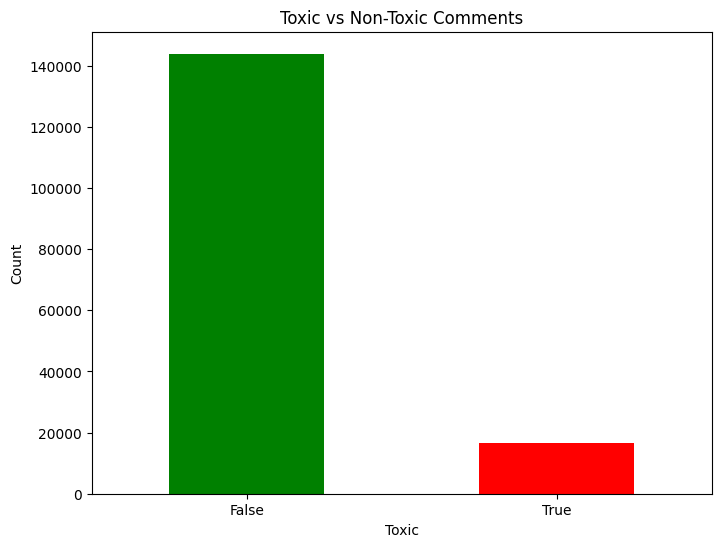

In [14]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

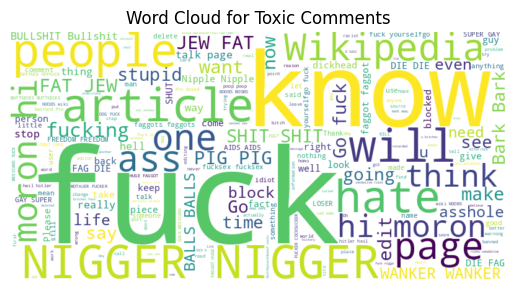

In [15]:
# Word Cloud for toxic and non-toxic comments
toxic_comments = ' '.join(df[df['Toxic']]['Text'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

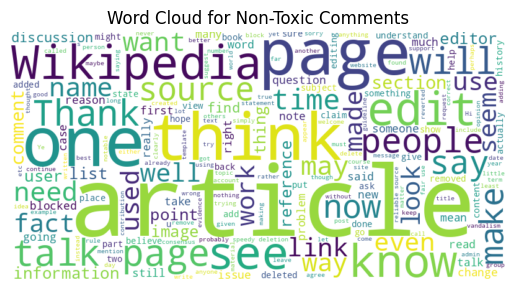

In [16]:
non_toxic_comments = ' '.join(df[~df['Toxic']]['Text'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

# Transformation of Data

In [17]:
# Convert True to 1 and False to 0 in the 'Toxic' column
df['Toxic'] = df['Toxic'].astype(int)

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [19]:
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
df['Text'] = df['Text'].map(lambda com : clean_text(com))

In [20]:
df

,Text,Toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i am s...,0
2,hey man i am really not trying to edit war it ...,0
3,more i cannot make any real suggestions on imp...,0
4,you sir are my hero any chance you remember wh...,0
...,...,...
160563,i remember that they sent in the national defe...,0
160564,stats don t represent the problem race baiting...,1
160565,the quote from the mother wow that hit hard ve...,0
160566,this video is so racist,0


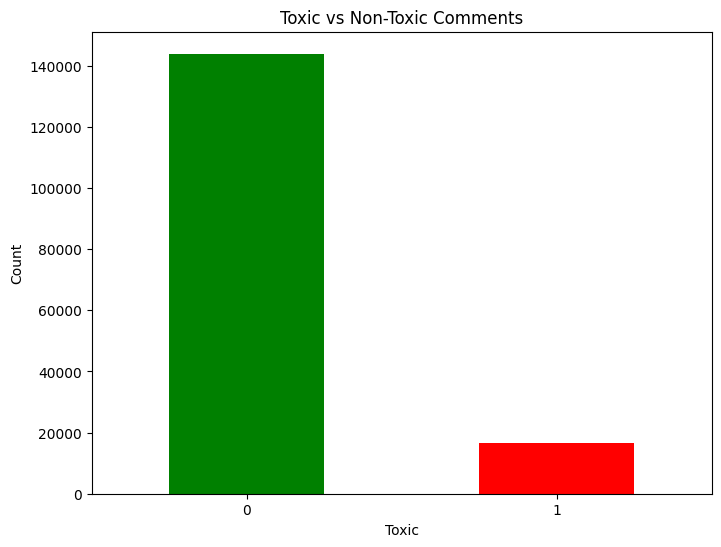

In [21]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Vectorizer

In [22]:
# Vectorize the text data using TF-IDF
vect = TfidfVectorizer(max_features=5000, stop_words='english')
X = vect.fit_transform(df['Text'])
Y = df['Toxic']

# SMOTE

using SMOTE to deal with class imbalance

In [23]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE for oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [24]:
# Convert the oversampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled.todense(), columns=vect.get_feature_names_out())
df_resampled['Toxic'] = y_resampled

# Check the distribution after oversampling
toxic_distribution_after = df_resampled['Toxic'].value_counts()
print("\nDistribution after SMOTE:")
print(toxic_distribution_after)


Distribution after SMOTE:
Toxic
0    143884
1    143884
Name: count, dtype: int64


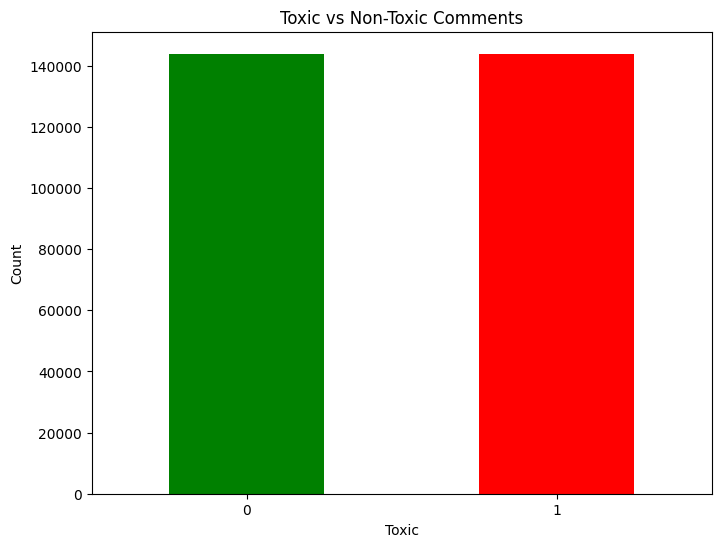

In [25]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df_resampled['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Spliting Data

In [26]:
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Model Building

In [27]:
# Build the neural network model with Input layer
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Training the Model

In [ ]:
# Train the model
history = model.fit(x_train.toarray(), y_train, epochs=5, batch_size=32, validation_split=0.2)


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Evaluation of Model

In [ ]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred_proba = model.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred_proba = model.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Extract relevant metrics for visualization
class_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotting the classification report metrics using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.yticks(rotation=0)
plt.show()


# Save Vectorizer and Model

In [ ]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vect, f)

# Save Keras model
model.save('toxic_comment_model.h5')

# Usage Code

In [ ]:
# import joblib
# from tensorflow.keras.models import load_model

# # Load TF-IDF Vectorizer
# loaded_vect = joblib.load('tfidf_vectorizer.joblib')

# # Load Trained Model
# loaded_model = load_model('toxic_comment_model.h5')
# new_comments = [
#     "I love this website, it's so helpful!",
#     "This is the worst product ever, total waste of money.",
#     "The author of this article is brilliant!",
#     "This software is a scam, do not buy it.",
#     "The customer service was excellent, very helpful and friendly.",
# ]

# # Preprocess new comments using the loaded TF-IDF Vectorizer
# new_comments_tfidf = loaded_vect.transform(new_comments)

# # Predict using the loaded model
# predictions = (loaded_model.predict(new_comments_tfidf.toarray()) > 0.5).astype(int)

# # Print predictions
# for comment, prediction in zip(new_comments, predictions):
#     print(f'Comment: {comment} | Toxic: {bool(prediction)}')

